# Plotting a grouped bar chart

<p>In this notebook we have classified the interest of students in the different fields of Data Science</p>

##### Importing the required libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Reading and displaying the data

In [2]:
df = pd.read_csv("Topic_Survey_Assignment.csv")
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


##### Renaming the column name

In [4]:
df.rename( columns={'Unnamed: 0':'Interest'}, inplace=True )
df.head()

,Interest,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


##### Setting the first column as index and displaying the result

In [5]:
df.set_index('Interest', inplace=True)

In [6]:
df.head()

,Very interested,Somewhat interested,Not interested
Interest,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


##### Re-arranging the table in the ascending order

In [7]:
df.sort_values(by='Very interested', ascending = False, inplace = True)
df

,Very interested,Somewhat interested,Not interested
Interest,,,
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


##### Adding the column 'Total' to know the total no.of.students for that field

In [8]:
df['Total'] = df.sum(axis = 1)
df

,Very interested,Somewhat interested,Not interested,Total
Interest,,,,
Data Analysis / Statistics,1688,444,60,2192
Machine Learning,1629,477,74,2180
Data Visualization,1340,734,102,2176
Big Data (Spark / Hadoop),1332,729,127,2188
Deep Learning,1263,770,136,2169
Data Journalism,429,1081,610,2120


##### Finding the percentage of the value

In [9]:
df['Very interested'] = (df['Very interested']/df['Total'])*100
df['Somewhat interested'] = (df['Somewhat interested']/df['Total'])*100
df['Not interested'] = (df['Not interested']/df['Total'])*100
df = df[['Very interested','Somewhat interested','Not interested']]
df

,Very interested,Somewhat interested,Not interested
Interest,,,
Data Analysis / Statistics,77.007299,20.255474,2.737226
Machine Learning,74.724771,21.880734,3.394495
Data Visualization,61.580882,33.731618,4.687500
Big Data (Spark / Hadoop),60.877514,33.318099,5.804388
Deep Learning,58.229599,35.500231,6.270171
Data Journalism,20.235849,50.990566,28.773585


##### Displaying the bar graph by rouding up the pecentage upto 2 decimal places

In [10]:
import numpy as np
df = np.round(df,decimals=2)

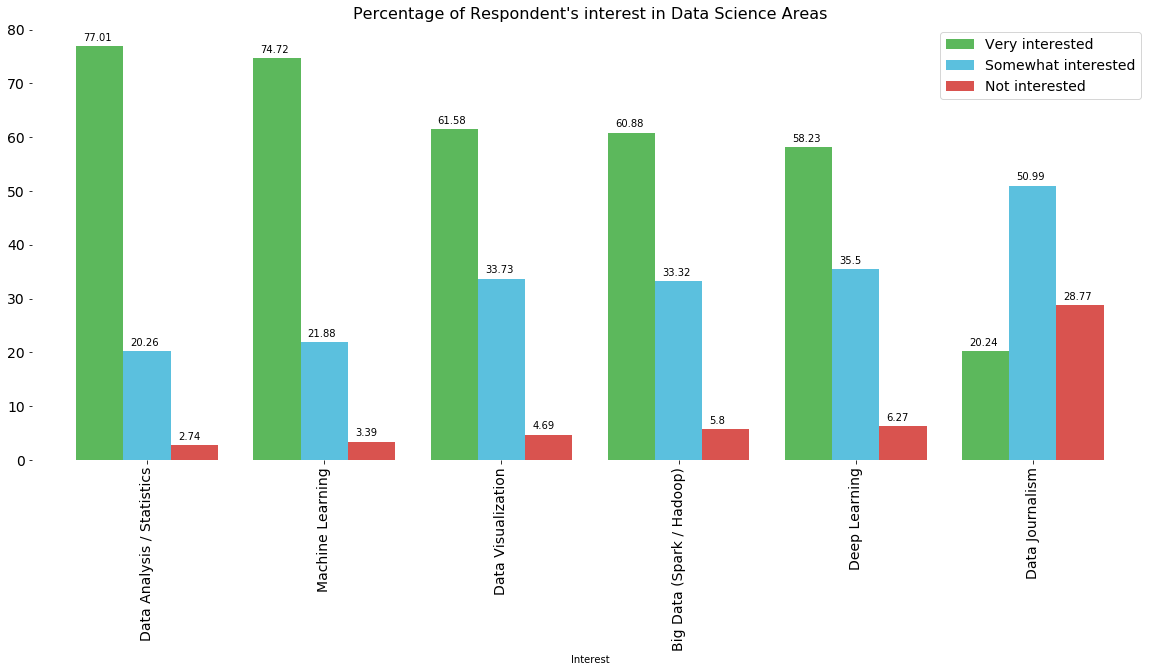

In [11]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
my_colors = list(islice(cycle(['#5cb85c', '#5bc0de', '#d9534f']), None, len(df)))
ax = df.plot(kind = 'bar' , width = 0.8, figsize=(20, 8), fontsize = 14, color = my_colors)
plt.title("Percentage of Respondent's interest in Data Science Areas", fontsize = 16) # add title to the plot
plt.legend(labels=df.columns,fontsize= 14)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks()

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(format(height),(p.get_x()+.15*width, p.get_y() + height + 1.0))